# A basic supervised exercise

# 1. Goal of the exercise

In this exercise you will practice the basic pipeline of the supervised learning task. Implement a simple regressor. And will try to solve several hinderances found in the process.

# 2. Deliverables
As you progress in this exercise, you will find several questions you are expected to answer them properly with adequate figures when required and deliver this notebook with all these evidences in due time. The notebook must include all necessary code to generate the evidences as well as the discussion of the answers



<div class = "alert alert-danger" style="border-radius:10px"> **IMPORTANT:** Write in the next cell the name of the people that answer this notebook
</div>

## Salvador Medina Herrera, Johannes Heidecke

# 3. Our first regressor

We are given the data in ’reg_data_set1.pkl’(univariate basic dataset) our goal is to predict the $y$ value. Our first model to try is linear regression as explained in ”A gentle introduction to supervised learning”.


## A. Data set analysis
Load the dataset and describe the basic properties of the data,

<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOC 1:** Draw a scatter plot showing the data $x$ in the set with their corresponding $y$ values.
<p>
**HINT:** Next cell reads the file and imports module `matplotlib`. This module allows you to plot lines, scatter plots, dots, etc. Check `plt.scatter` and `plt.plot` for solving this exercise.
</div>

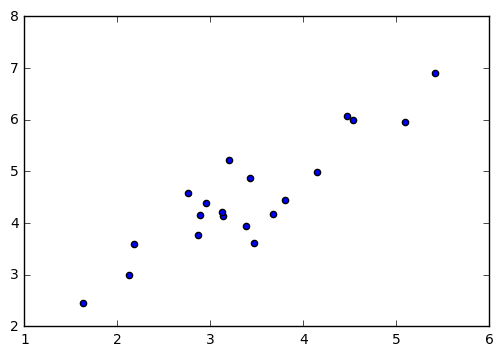

In [1]:
import pickle
import matplotlib.pyplot as plt

f = open('reg_data_set1.pkl','r')
x,y=pickle.load(f)
f.close()

%matplotlib inline
# print data in scatter plot:
plt.scatter(x, y)


## B. Analytical solution for the linear regression method.
In this part, you are expected to implement the analytical version of linear regression using a least mean squared error loss.

<div class = "alert alert-success" style = "border-radius:10px"> <b>QUESTION BLOCK 2:</b>
<ol>
<li>Which is the optimal value of the linear regression weights? </li>
<li>Plot the data set and the line learned by the model. Does it looks like a good
linear approximation?</li>
</ol>
<p>
** HINT: ** The `numpy` module is your best friend here. Dot product can be called using `np.dot` function. If you need to concatenate data you may use `np.c_`, `np.concatenate`, or `np.vstack`/`np.hstack`.
</div>

In [2]:
import numpy as np

def getXWave(x, p=1): 
    # return xWave in the following structure:
    # (1, x1, ..., x1^p)
    # (1, x2, ..., x2^p)
    #   ...
    # (1, xn, ..., xn^p)
    assert p >= 0, "The polynomial's degree has to be at least 0"
    xWave = np.ones((len(x), 1))
    for i in range(1, p+1):
        xWave = np.hstack((xWave, x ** i))
    return xWave
        
def solveAnalytically(x, y, p=1):
    # calculating optimal values for the regression weights analytically

    #construct xWave:
    xWave = getXWave(x, p)
    # solve analytically for w:
    w = np.linalg.inv(xWave.T.dot(xWave)).dot(xWave.T).dot(y)
    return w
    
w = solveAnalytically(x, y)

# Question 2-1:
print "The optimal weights calculated analytically are:\n", w

The optimal weights calculated analytically are:
[[ 1.04015457]
 [ 1.02081691]]


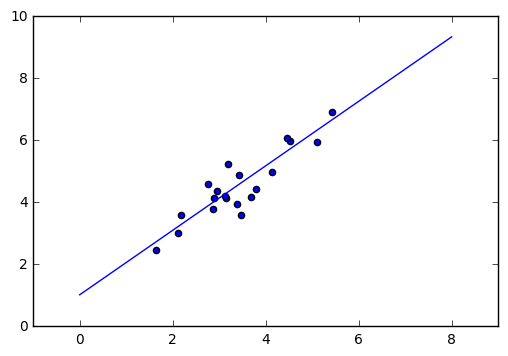

In [3]:
assert w.shape==(2,1),'The shape of the weight vector must be (2,1)'

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.hold('on')

x_draw = np.linspace(0,8,100)
x_draw = np.c_[x_draw,np.ones((x_draw.shape[0],1))]
plt.plot(x_draw[:,0],np.dot(x_draw,w))

In [4]:
def MSE(x, y, w):
    # calculate the mean square error between the target outputs y,
    # and the calculated targets f(x) of the polynomial f of degree p 
    # with coefficients w0, .. wp:
    
    # deduce p from number of coefficients w:
    p = len(w)-1
    
    # calculate targets of f(x)
    yCalc = np.dot(getXWave(x,p), w)
    
    # calculate differences:
    yDiff = yCalc - y
    
    # return the mean squared error:
    return np.sum(yDiff ** 2)/len(y)

def RMSE(x, y, w):
    # calculate the root mean squared error
    # representing the sample standard deviation
    return np.sqrt(MSE(x, y, w))

def CVRMSE(x, y, w):
    # calcualte the coefficent of variation based on RMSE
    # normalized by mean of y values
    return RMSE(x, y, w)/np.mean(y)

# Question 2-1:
print "The CV(RMSE) of the calculated targets and the actual targets is: ", CVRMSE(x, y, w)
print "It is a relatively good linear approximation."

The CV(RMSE) of the calculated targets and the actual targets is:  0.103324204587
It is a relatively good linear approximation.


## C. Linear regression and the descent method.
In this part, you are expected to implement the basic gradient descent version for optimizing linear regression with fixed learning rate.
<p>
<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 3:**
<ol>
<li>Which is the optimal value of the linear regression weights using the descent method?</li>
<li>Which are the parameters of the descent method used to obtain the optimal value? i.e. learning rate value, number of iterations.</li>
<li>Plot the convergence curve of the method (The value of the objective function with respect to the number of iterations).</li>
<li>Zoom in the flat convergence part. Does it oscillate? Why?</li>
<li>Change the learning rate to 0.1. Plot the convergence curve of the method.</li>
</ol>
</div>


In [5]:
def gradientDescent(x, y, lRate, iterations, w = np.array([[0.],[0.]]), wHistory=[]):
    # implementation of basic steepest descent algorithm
    # 'lRate' is learning rate
    # 'iterations' is number of iterations
    # 'w' contains initial weights for the coefficients 
    # len(w) determines the degree of the polynomial
    # default w is [[0], [0]] with p = 1
    # 'wHistory' can take a list and fill it with the history of w values
    # also see: 'getConvergenceCurve'
    
    p = len(w) - 1
    xWave = getXWave(x, p)
    
    for k in range(0, iterations):
        nablaJw = np.dot(xWave.T,(np.dot(xWave, w) - y)) / len(x)
        w = w - np.multiply(lRate, nablaJw)
        wHistory.append(w)
    return w

   


# Question 3-1:
# With a learning rate of 0.125 and 500 iterations the following
# coefficients are calculated:

w = gradientDescent(x, y, 0.125, 500)
print(w)
print(CVRMSE(x, y, w) * 100)

[[ 1.02879113]
 [ 1.02392691]]
10.332636465


In [6]:
# Question 3-2:

# After 500 iterations, the following CV(RMSE) are achieved:
# Learning rate = 0.01:
w = gradientDescent(x, y, 0.01, 500)
print('500 iterations, learning rate = 0.01:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')
# Learning rate = 0.05:
w = gradientDescent(x, y, 0.05, 500)
print('500 iterations, learning rate = 0.05:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')
# Learning rate = 0.075:
w = gradientDescent(x, y, 0.075, 500)
print('500 iterations, learning rate = 0.075:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')
# Learning rate = 0.1:
w = gradientDescent(x, y, 0.1, 500)
print('500 iterations, learning rate = 0.1:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')
# Learning rate = 0.125:
w = gradientDescent(x, y, 0.125, 500)
print('500 iterations, learning rate = 0.125:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')
# Learning rate = 0.145:
w = gradientDescent(x, y, 0.145, 500)
print('500 iterations, learning rate = 0.145:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')

# A learning rate of 0.145 yields the best results after 500 iterations.
# A higher number of iteration yields better results, constraint by diminishing returns.
# For a learning rate equal or bigger than 0.15, the algorithm does not converge.
# For very small learning rates, the algorithm requires more iterations.

500 iterations, learning rate = 0.01:	10.7574%
500 iterations, learning rate = 0.05:	10.3634%
500 iterations, learning rate = 0.075:	10.3384%
500 iterations, learning rate = 0.1:	10.3336%
500 iterations, learning rate = 0.125:	10.3326%
500 iterations, learning rate = 0.145:	10.3325%


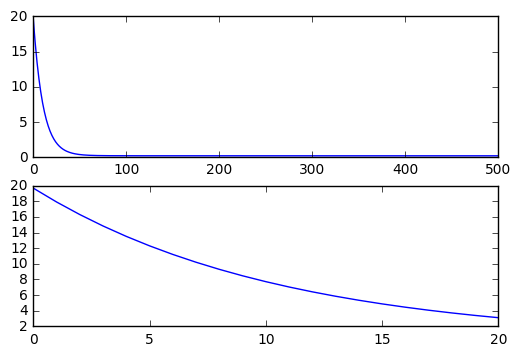

In [7]:
def getConvergenceCurve(x, y, lRate, iterations, w=np.array([[0],[0]])):
    # returns the MSEs for all iterations of the gradient descent algorithm
    
    # get the w values of all iterations saved in 'hist'
    hist = []
    gradientDescent(x, y, lRate, iterations, wHistory=hist)
    # convert to numpy array
    hist = np.array(hist)
    # calculate MSEs for ws of all iterations
    mses = []
    for el in hist:
        mses.append(MSE(x, y, el))
    return mses
    

# Question 3-3:
# This shows the convergence curve for the first 500 and first 20 iterations
# Chosen learning rate: 0.0125
plt.subplot(2,1,1)
plt.plot(getConvergenceCurve(x, y, 0.145, 500))
plt.subplot(2,1,2)
plt.plot(getConvergenceCurve(x, y, 0.145, 500)[:21])

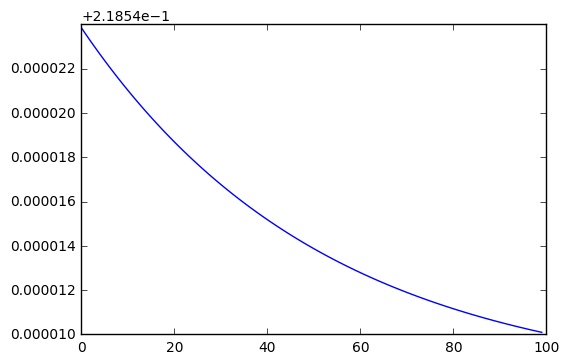

In [8]:
# Question 3-4:
# Zooming into the flat part:
# Showing the MSEs for the last 100 iterations
plt.plot(getConvergenceCurve(x, y, 0.145, 500)[400:])

# The results are still converging to a better result, 
# but with decreasing improvement

# The convergance does not seem to oscillate.
# The reason for this is that the step size is not constant:
# The gradient vector is not normalized

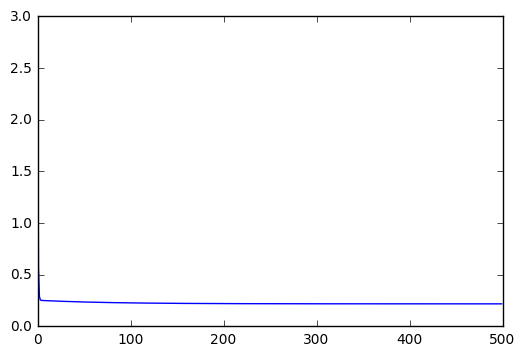

In [9]:
# Question 3-5:
# Plotting the convergence curve for learning rate 0.1:
plt.plot(getConvergenceCurve(x, y, 0.1, 500))

Modify the descent algorithm so that your descent direction is
$$\Delta x= − \frac{\nabla f(x)} {\|\nabla f (x)\|_2}$$

<p>
<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 4:**
<ol>
<li>Which is the optimal value of the linear regression weights using the modified descent method?</li>
<li> Which are the parameters of the descent method used to obtain the optimal value? i.e. learning rate value, number of iterations.</li>
<li> Plot the convergence curve of the method (The value of the objective function with respect to the number of iterations). </li>
<li> Zoom in the flat convergence part. Does it oscillate? Why? </li>
</ol>
<p>
**HINT:** The norm of a vector can be found invoking `np.linalg.norm`.

</div>

In [10]:
def modifiedGradientDescent(x, y, lRate, iterations, w = np.array([[0.],[0.]]), wHistory=[]):
    # implementation of modified steepest descent algorithm
    # 'lRate' is learning rate
    # 'iterations' is number of iterations
    # 'w' contains initial weights for the coefficients 
    # len(w) determines the degree of the polynomial
    # default w is [[0], [0]] with p = 1
    # 'wHistory' can take a list and fill it with the history of w values
    # also see: 'getConvergenceCurve'
    
    p = len(w) - 1
    xWave = getXWave(x, p)
    
    
    for k in range(0, iterations):
        nablaJw = np.dot(xWave.T,(np.dot(xWave, w) - y)) / len(x)
        w = w - np.multiply(lRate / np.linalg.norm(nablaJw), nablaJw)
        wHistory.append(w)
    return w

# Question 4-1:
w = modifiedGradientDescent(x, y, 0.01, 500)
print(w)

[[ 1.02169953]
 [ 1.02068468]]


In [11]:
# Question 4-2
# After 500 iterations, the following CV(RMSE) are achieved:
# Learning rate = 0.01:
w = modifiedGradientDescent(x, y, 0.01, 500)
print('500 iterations, learning rate = 0.01:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')
# Learning rate = 0.02:
w = modifiedGradientDescent(x, y, 0.02, 500)
print('500 iterations, learning rate = 0.02:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')
# Learning rate = 0.04:
w = modifiedGradientDescent(x, y, 0.04, 500)
print('500 iterations, learning rate = 0.04:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')
# Learning rate = 0.05:
w = modifiedGradientDescent(x, y, 0.05, 500)
print('500 iterations, learning rate = 0.05:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')
# Learning rate = 0.1:
w = modifiedGradientDescent(x, y, 0.1, 500)
print('500 iterations, learning rate = 0.1:\t' + str(round(CVRMSE(x, y, w) * 100, 4)) + '%')


# A learning rate of 0.01 yields the best results after 500 iterations.
# A higher number of iteration yields better results, constraint by diminishing returns.
# For very small learning rates, the algorithm requires more iterations.

500 iterations, learning rate = 0.01:	10.3409%
500 iterations, learning rate = 0.02:	10.3644%
500 iterations, learning rate = 0.04:	10.4593%
500 iterations, learning rate = 0.05:	10.5543%
500 iterations, learning rate = 0.1:	11.2708%


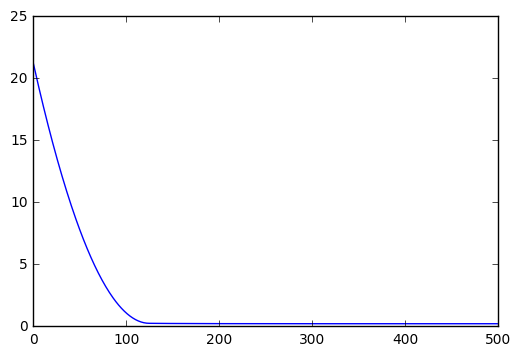

In [12]:
def getModifiedConvergenceCurve(x, y, lRate, iterations, w=np.array([[0],[0]])):
    # returns the MSEs for all iterations of the gradient descent algorithm
    
    # get the w values of all iterations saved in 'hist'
    hist = []
    modifiedGradientDescent(x, y, lRate, iterations, wHistory=hist)
    # convert to numpy array
    hist = np.array(hist)
    # calculate MSEs for ws of all iterations
    mses = []
    for el in hist:
        mses.append(MSE(x, y, el))
    return mses

# Question 4-3
plt.plot(getModifiedConvergenceCurve(x, y, 0.01, 500))

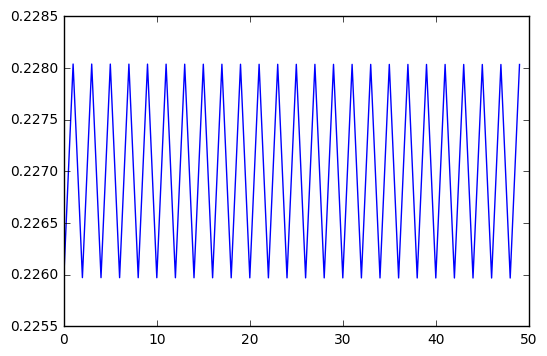

In [13]:
# Question 4-4:
# Zoom into the last 50 iterations for learning rate 0.05:
plt.plot(getModifiedConvergenceCurve(x, y, 0.05, 500)[450:])

# The convergence curve oscillates.
# This is because we are now updating the coefficient with normed lengths
# The algorithm will at some point jump over the target value, then back,
# resulting in a oscillation.


## D. A second model.

Consider now a polynomial model of degree p for the univariate case, i.e. $f(x;w) = w_0 + w_1x+w_2x^2 +· · ·+w_px^p$. Observe that it can be expressed as a linear combination of transformed data points $z = \{1,x,x^2,...,x^p\}$,

$$
f(x;w) = \sum_{i=0}^p w_i x^i = \sum_{i=0}^p w_i z_i = {\bf w}^T{\bf z}
$$

<p>
<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 5:**
<ol>
<li>Transform the training set into the set with examples described by z considering p = 3. Apply, the analytic solution code (if properly coded it should work without modifications). Which is the optimal value of the weights?</li>
<li> Plot the data set and the curve just found. Does it fit better the data? Why?</li>
</ol>
</div>


In [14]:
# Question 5-1:
w = solveAnalytically(x, y, 3)
print("The optimal coefficient values for p=3 are:")
print(w)

The optimal coefficient values for p=3 are:
[[-2.72757079]
 [ 4.90043255]
 [-1.22723706]
 [ 0.12035158]]


0.329937724202


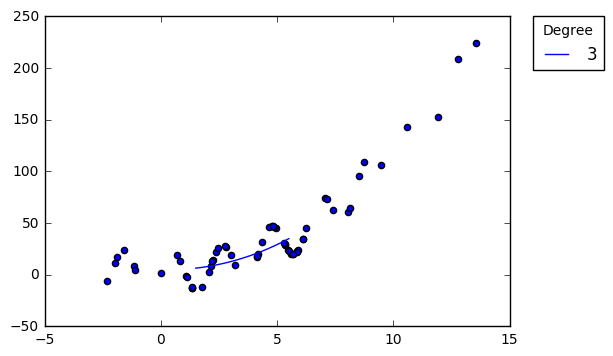

In [37]:
def plotPolyPlot(lower, upper, samples, w, label=False):  

    xDraw = np.linspace(lower,upper,samples)
    result = np.ones(xDraw.shape)
    for i in range(1, len(w)):
        # result = np.concatenate((result, xDraw ** i), axis=0)
        result = np.c_[result, xDraw ** i]
    plt.plot(xDraw, np.dot(result, w), label=len(w)-1)
    if label:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Degree')

# Question 5-2:
w = solveAnalytically(x, y, 3)
plt.scatter(x,y)
plt.hold('on')
plotPolyPlot(1.5, 5.5, 25, w, True)

# calculate CV(RMSE):
print(CVRMSE(x, y, w))
# The CV(RSME) for the polynomial of third degree is smaller than for linear regression
# The function fits the data better
    


## E. Evaluating a model.

Data set `reg_data_set2.mat` is a small set for regression. In this exercise we just want to select the best model among the following $p = 1, 2, . . . , 6$. The best fit is given by the polynomial displaying smaller RMS (root mean square) value. RMS is defined as the squared loss for the data considered
􏰋􏰊􏰊􏰈$$
RMS = \sqrt{\frac{1}{N}\sum_{i=0}^N (f(x_i;w)-y_i)^2}
$$


<p>
<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 6:**
<ol>
<li>Use the first half of the data set for training and the second half for validation.</li>
<li> Optimize the models (you can use any of the methods implemented before) and
plot the validation set and the 6 models plots.</li>
<li> Plot the training set and the 6 models plots.</li>
<li> Compute the RMS error on the training set and on the validation set. Plot both
error curves and describe their behavior. </li>
<li> Does the selected model agrees with the model that performs the best on the
training set? Which one do you think is the optimal choice? Why? (You are not supposed to give an exhaustive answer to this question but your impressions and ideas. We will see the reasons why this effect happens shortly.)</li>
</ol>
</div>


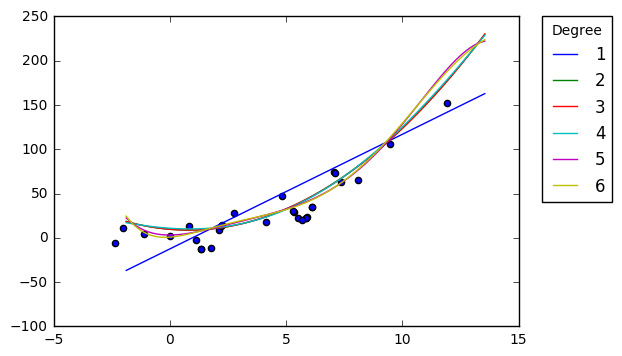

In [51]:
# Question 6-1:
f = open('reg_data_set2.pkl','r')
x,y=pickle.load(f)
f.close()

# Split the data set in half for training and validation
# We simply split by the middle index, because the data is well distributed
# For more ordered data sets, random sampling should be applied
xTrain = x[:len(x)/2]
yTrain = y[:len(y)/2]

xValid = x[len(x)/2:]
yValid = y[len(x)/2:]

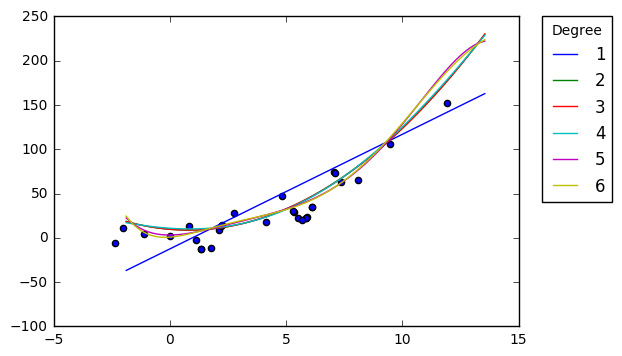

In [53]:
# Question 6-2:

# We plot the validation set
plt.scatter(xValid, yValid)
plt.hold('on')

for i in range(1, 7):
    # Calculate polynomial coefficients analytically for degre p = 1, .., 6
    w = solveAnalytically(xTrain, yTrain, i)
    # Plot the model curves
    plotPolyPlot(np.min(xTrain), np.max(xTrain), 100, w, True)

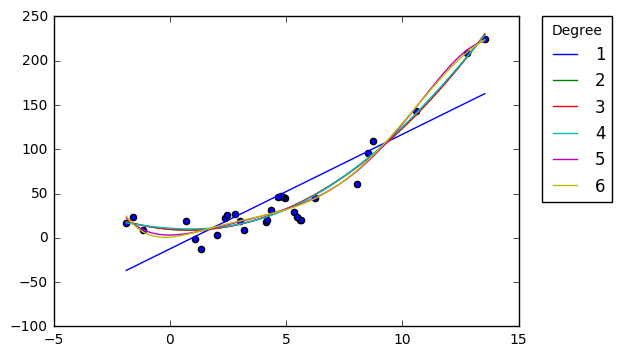

In [52]:
# Question 6-3:

# Plot the training set and the 6 model curves
plt.scatter(xTrain, yTrain)
plt.hold('on')

for i in range(1, 7):
    w = solveAnalytically(xTrain, yTrain, i)
    plotPolyPlot(np.min(xTrain), np.max(xTrain), 100, w, True)
    
# While the estimated models stay the same as in question 2,
# it can clearly be seen that they fit much better to this training set

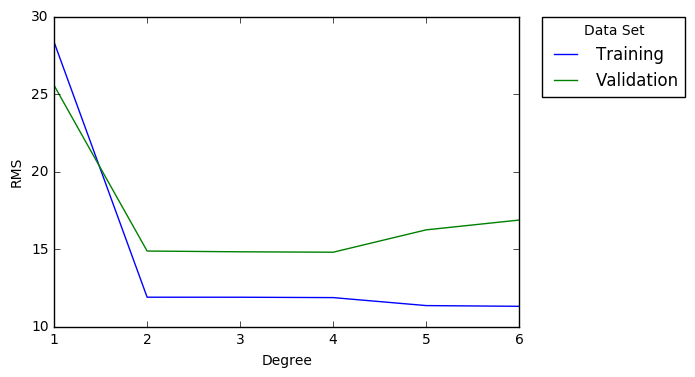

In [49]:
# Question 6-4:
eTrain = []
eValid = []
# Calculate RMSE (rooted mean squared error) for each model
# for both training and validation sets:
for i in range(1, 7):
    w = solveAnalytically(xTrain, yTrain, i)
    eTrain.append(RMSE(xTrain, yTrain, w))
    eValid.append(RMSE(xValid, yValid, w))

# Plot the curves:
plt.ylabel('RMS')
plt.xlabel('Degree')
plt.hold('on')
xLinespace = np.linspace(1,6,6);
plt.plot(xLinespace, eTrain, label="Training")
plt.plot(xLinespace, eValid, label="Validation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='Data Set')

# The RMSE decreases monotonously for the training set with increasing degree.
# For the validation set, it decreases until degree = 4 and then increases again.    

In [ ]:
# Question 6-5:
# The two curves clearly differ in their behavior 
# (monotonoulsy decreasing vs. minimum for degrees 2,3 and 4).
# This is an indicator for overfitting in degrees > 4.
# The models of these higher degrees fit the training data more closely,
# but are less fit to generalize the pattern.
# This makes the obtained regression perform worse in the validation set.